In [7]:
import pandas as pd
import plotly.express as ex
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime

Objective
1)Volume of the stock Traded
2) Netflix Stock Price - High, Open, Close
3) Netflix Stock Price - Day, Month , Year-Wise
4) Top-5 Dates with Highest Stock Price
5) Top-5 Dates with Lowest Stock Price

In [8]:
url = "https://raw.githubusercontent.com/SouravAwasthi1/Netflix_stock_analysis/refs/heads/main/NFLX.csv"
df = pd.read_csv(url)

In [9]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
5039,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
5040,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
5041,2022-06-01,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
5042,2022-06-02,192.020004,205.470001,191.720001,205.089996,205.089996,9623100


1) Volume of Stock Traded

In [10]:
sns.set(rc={'figure.figsize': (10,5)})

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df=df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


Text(0.5, 1.0, 'Volume of the Stock versus the time')

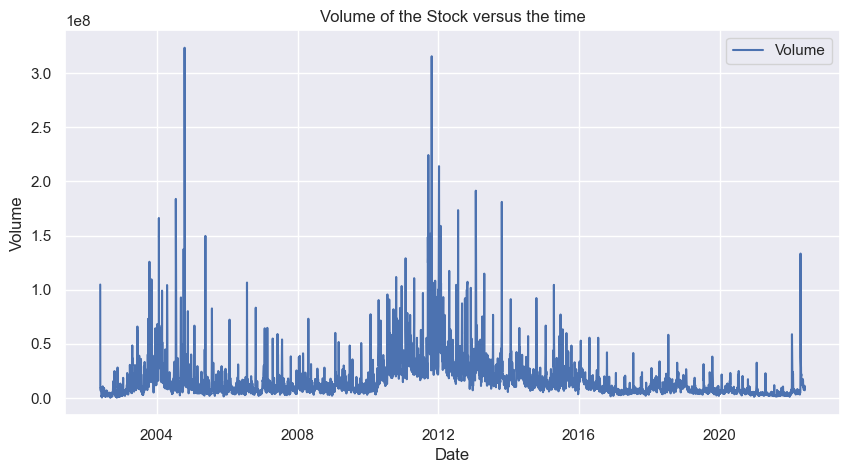

In [12]:
sns.lineplot(x=df.index, y= df['Volume'],label = 'Volume')
plt.title('Volume of the Stock versus the time')

2. Netflix Stock Price : High, Open ,Close

Text(0.5, 1.0, 'Netflix Stock Prices - High, Open , Close')

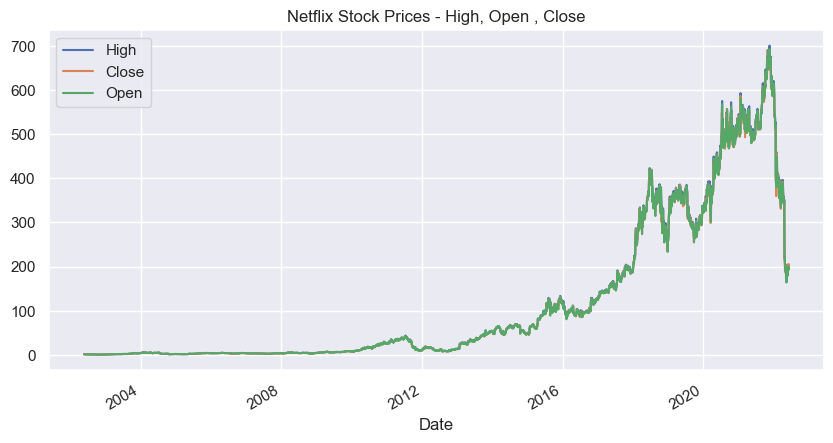

In [13]:
df.plot( y = ['High','Close','Open'])
plt.title('Netflix Stock Prices - High, Open , Close')

3. Netflix Stock Price - Day , Month, Year-Wise

<Axes: xlabel='Year'>

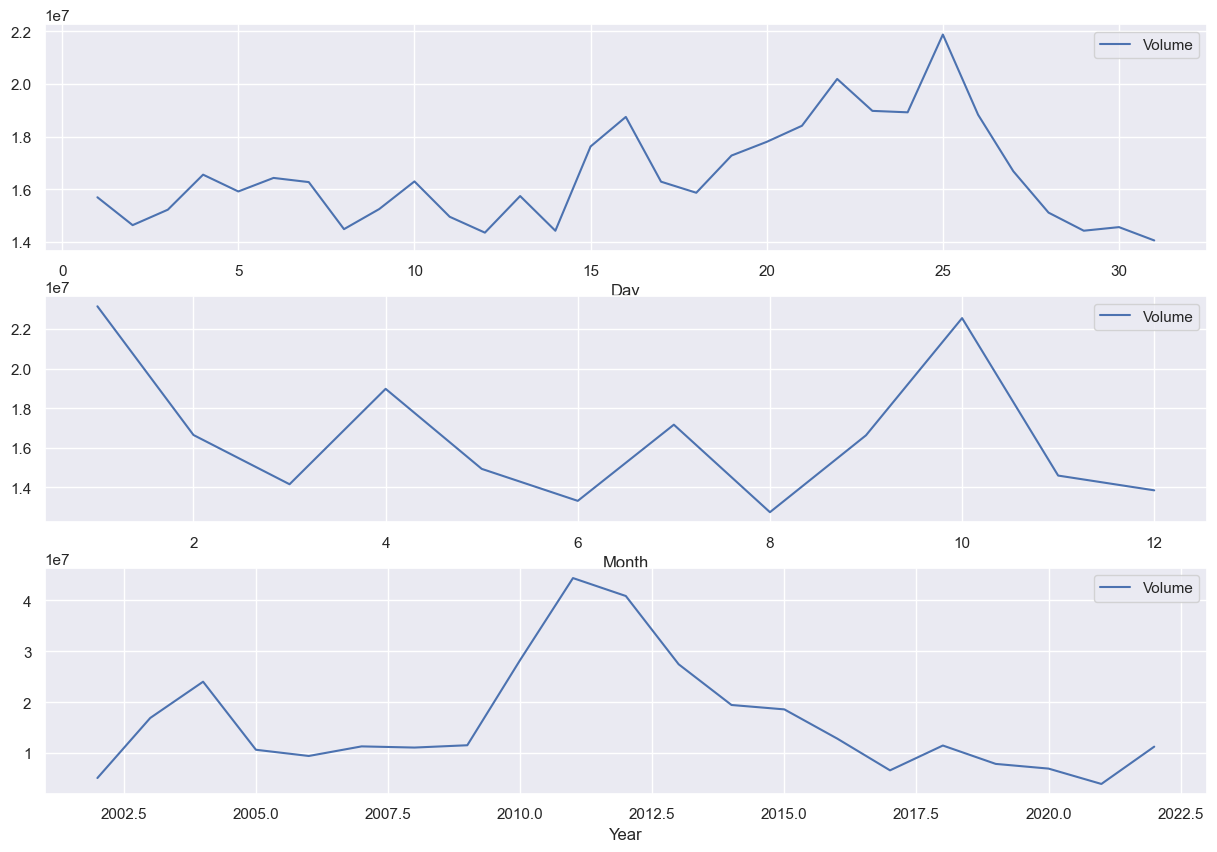

In [19]:
fig, (ax1, ax2, ax3)= plt.subplots(3, figsize =(15,10))
df.groupby(df.index.day).mean().plot(y ='Volume', ax=ax1, xlabel = 'Day')
df.groupby(df.index.month).mean().plot(y ='Volume', ax=ax2, xlabel = 'Month')
df.groupby(df.index.year).mean().plot(y ='Volume', ax=ax3, xlabel = 'Year')

4. Top-5 Dates with the Highest Stock Price

In [20]:
a= df.sort_values(by ='High', ascending = False).head(5)
a['High']

Date
2021-11-17    700.989990
2021-11-19    694.159973
2021-11-18    691.739990
2021-10-29    690.969971
2021-11-01    689.969971
Name: High, dtype: float64

5. Top-5 Dates with the Lowest Stock Price

In [22]:
a= df.sort_values(by ='Low', ascending = True).head(5)
a['Low']

Date
2002-10-10    0.346429
2002-10-09    0.347143
2002-10-07    0.382143
2002-10-08    0.390714
2002-10-16    0.442857
Name: Low, dtype: float64

<Axes: xlabel='Date', ylabel='Low'>

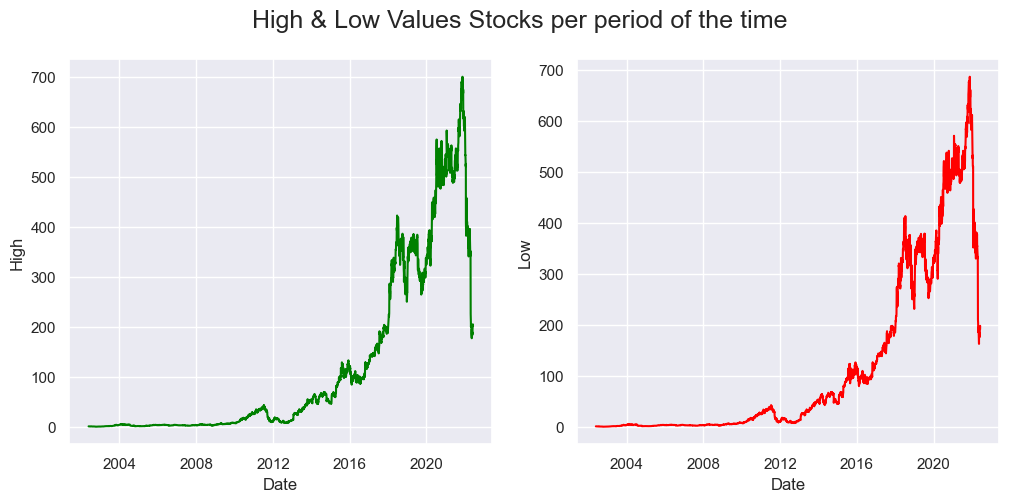

In [27]:
fig,axes = plt.subplots(nrows =1 , ncols= 2 , sharex = True , figsize=(12,5))
fig.suptitle('High & Low Values Stocks per period of the time', fontsize=18)
sns.lineplot(ax = axes[0], y= df['High'], x= df.index, color ='green')
sns.lineplot(ax = axes[1], y= df['Low'], x= df.index, color ='red')